In [19]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models.tfidfmodel import TfidfModel
from gensim.matutils import corpus2dense, corpus2csc
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, SparsePCA
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import SparsePCA, TruncatedSVD
from scipy.sparse import csc_matrix
import scipy.cluster.hierarchy as sch
from sklearn.manifold import TSNE

sns.set_style('whitegrid')

In [3]:
def load_dictionary(path='dataframes/dictionary.gensim'):
    return Dictionary.load(path)

In [4]:
def load_corpus(path='dataframes/corpus.pkl'):
    with open(path, 'rb') as file:
        corpus = pickle.load(file)
    return corpus

In [5]:
dictionary = load_dictionary('dataframes/dictionary.gensim')
corpus = load_corpus('dataframes/corpus.pkl')

In [6]:
num_docs = dictionary.num_docs
num_terms = len(dictionary.keys())

print('Number of unique tokens: {}'.format(num_terms))
print('Number of documents: {}'.format(num_docs))

Number of unique tokens: 7037
Number of documents: 3889


In [71]:
# Transform BOW model into TF-IDF
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [72]:
# Transform corpus into dense/sparse matrix
use_tfidf = True

if(use_tfidf):
    corpus_dense = corpus2dense(corpus_tfidf, num_terms, num_docs)    
    corpus_sparse = corpus2csc(corpus_tfidf)                          
else:
    corpus_dense = corpus2dense(corpus, num_terms, num_docs)
    corpus_sparse = corpus2csc(corpus)
    
    
print(corpus_dense.T.shape)
print(corpus_sparse.T.shape)

(3889, 7037)
(3889, 7037)


# Feature scaling

In [73]:
mms = MinMaxScaler()
scaled_data = mms.fit_transform(corpus_sparse.T.toarray())
scaled_data.shape

(3889, 7037)

# Clustering using Kmeans

In [74]:
kmeans = KMeans(n_clusters=29)
labels = kmeans.fit_predict(scaled_data)
centroids = kmeans.cluster_centers_

# Clustering using AgglomerativeClustering

In [76]:
def create_hierarchy_dendogram(dataframe):
    plt.figure(figsize=(17, 14))
    sch.dendrogram(sch.linkage(dataframe, method='ward'))


def agglomerative_clustering(n_clusters, dataframe):
    hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    labels = hc.fit_predict(dataframe)
    return labels

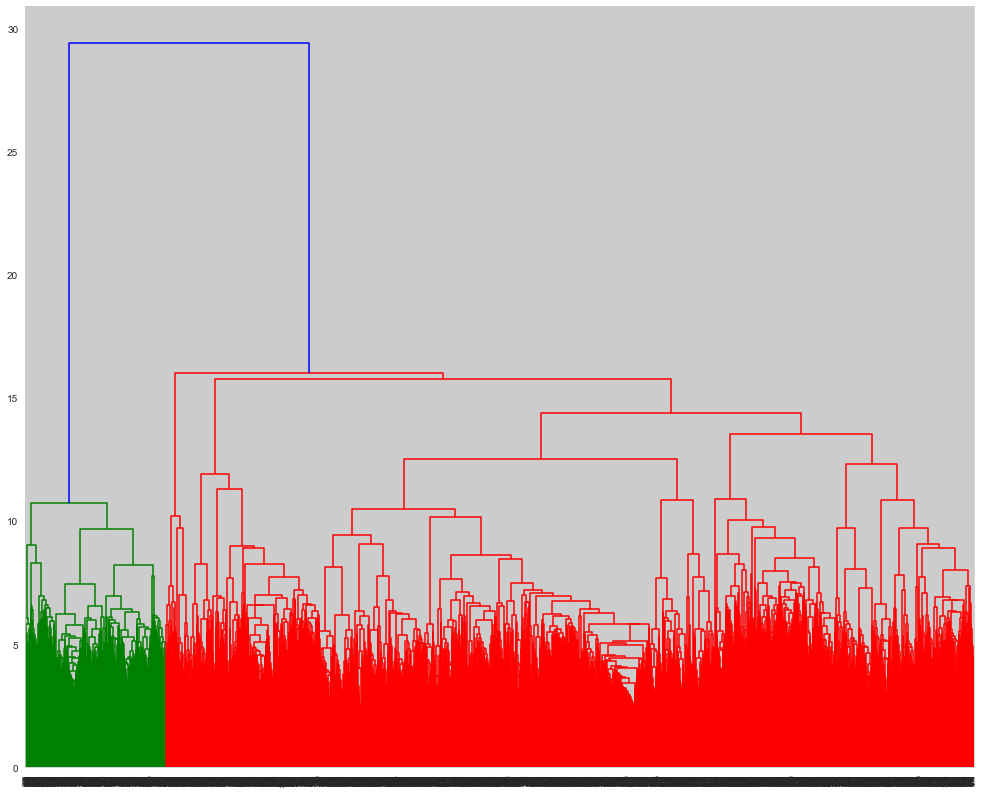

In [77]:
create_hierarchy_dendogram(scaled_data)

In [78]:
labelsAC = agglomerative_clustering(n_clusters=30, dataframe=scaled_data)

In [79]:
values, counts = np.unique(labelsAC, return_counts=True)

for val, cnt in zip(values, counts):
    print('{} - {}'.format(val, cnt))

0 - 319
1 - 118
2 - 100
3 - 144
4 - 878
5 - 141
6 - 248
7 - 321
8 - 93
9 - 91
10 - 209
11 - 122
12 - 16
13 - 228
14 - 60
15 - 41
16 - 42
17 - 165
18 - 14
19 - 56
20 - 31
21 - 5
22 - 7
23 - 149
24 - 13
25 - 81
26 - 66
27 - 21
28 - 61
29 - 49


Text(0, 0.5, 'Number of documents per cluster')

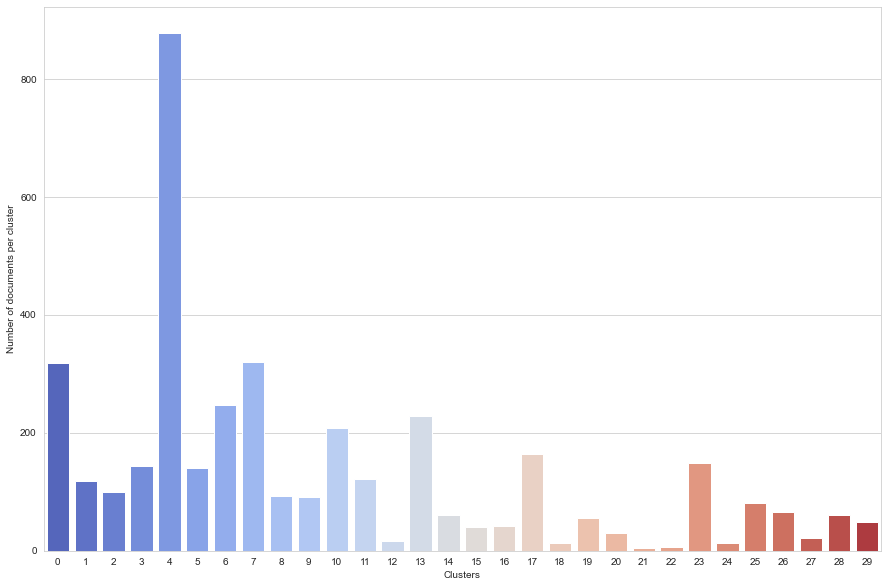

In [83]:
plt.figure(figsize=(15, 10))
sns.countplot(x=labelsAC, palette='coolwarm')
plt.xlabel('Clusters')
plt.ylabel('Number of documents per cluster')

In [80]:
birch = Birch(threshold=0.01, n_clusters=30)
labelsBirch = birch.fit_predict(scaled_data)

In [81]:
values, counts = np.unique(labelsBirch, return_counts=True)

for val, cnt in zip(values, counts):
    print('{} - {}'.format(val, cnt))

0 - 215
1 - 100
2 - 307
3 - 93
4 - 141
5 - 267
6 - 136
7 - 42
8 - 122
9 - 91
10 - 246
11 - 93
12 - 16
13 - 228
14 - 373
15 - 42
16 - 7
17 - 14
18 - 31
19 - 56
20 - 49
21 - 211
22 - 149
23 - 5
24 - 13
25 - 81
26 - 66
27 - 21
28 - 61
29 - 613


Text(0, 0.5, 'Number of documents per cluster')

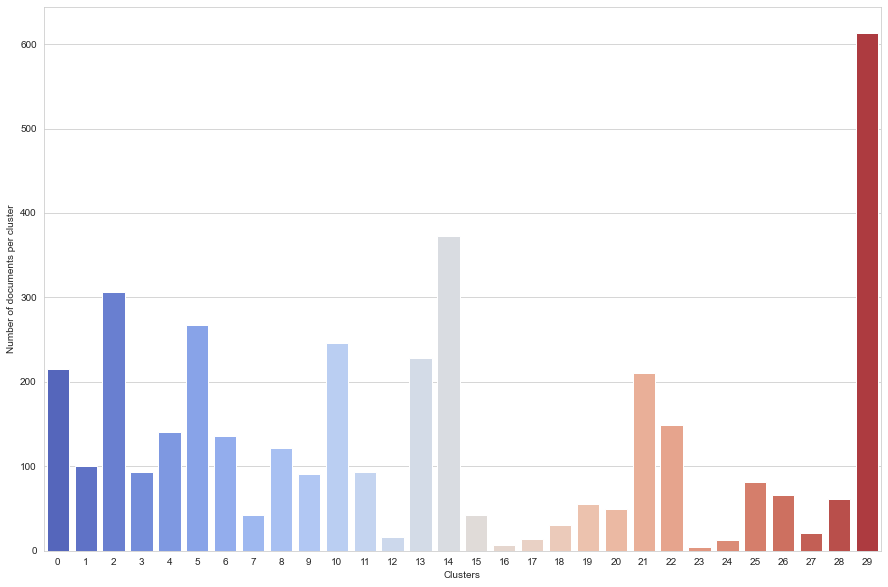

In [82]:
plt.figure(figsize=(15, 10))
sns.countplot(x=labelsBirch, palette='coolwarm')
plt.xlabel('Clusters')
plt.ylabel('Number of documents per cluster')

# Find optimal number of clusters

In [86]:
start = 2
limit = 41
step = 1

sse = []
for i in range(start, limit, step):
    inertia = MiniBatchKMeans(n_clusters=i, random_state=33).fit(scaled_data).inertia_
    sse.append(inertia)
    print('Fit {} clusters - SSE: {}'.format(i, inertia))

Fit 2 clusters - SSE: 41734.054551588924
Fit 3 clusters - SSE: 41724.2809505208
Fit 4 clusters - SSE: 41710.46313019897
Fit 5 clusters - SSE: 41691.108730708904
Fit 6 clusters - SSE: 41675.57983399641
Fit 7 clusters - SSE: 41688.98038082757
Fit 8 clusters - SSE: 41559.21860667101
Fit 9 clusters - SSE: 41561.54653424123
Fit 10 clusters - SSE: 41557.112726250714
Fit 11 clusters - SSE: 41597.98167193998
Fit 12 clusters - SSE: 41640.01144704319
Fit 13 clusters - SSE: 42119.482678248176
Fit 14 clusters - SSE: 41661.58534529001
Fit 15 clusters - SSE: 42074.77087383591
Fit 16 clusters - SSE: 41529.15927894811
Fit 17 clusters - SSE: 41669.21083736648
Fit 18 clusters - SSE: 41930.37903927812
Fit 19 clusters - SSE: 42057.944304362434
Fit 20 clusters - SSE: 41966.03303094378
Fit 21 clusters - SSE: 42035.68358746392
Fit 22 clusters - SSE: 41423.60731199689
Fit 23 clusters - SSE: 41999.41705940804
Fit 24 clusters - SSE: 41430.48361809323
Fit 25 clusters - SSE: 41407.39449506425
Fit 26 clusters - SS

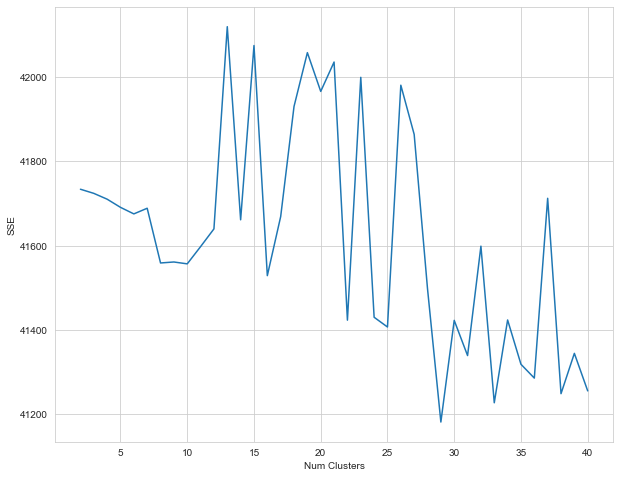

In [87]:
def plot_clustering_sse(sse, limit, start, step):
    x = range(start, limit, step)
    plt.figure(figsize=(10, 8))
    plt.plot(x, sse)
    plt.xlabel("Num Clusters")
    plt.ylabel("SSE")
    #plt.legend(("sse"), loc='best')
    
plot_clustering_sse(sse=sse, limit=limit, start=start, step=step)

In [88]:
# best kmeans model is with 30 clusters, similar to best LDA model with 29 topics!
optimal_model = MiniBatchKMeans(n_clusters=30, random_state=33)
labels = optimal_model.fit_predict(scaled_data)
centroids = optimal_model.cluster_centers_

In [89]:
print('Dimensions of clustering data: {}'.format(scaled_data.shape))
print('Dimensions of cluster centroids: {}'.format(centroids.shape))
#for word in dictionary.values():
#    print(word)

Dimensions of clustering data: (3889, 7037)
Dimensions of cluster centroids: (30, 7037)


# Using Birch clustering model with 30 clusters (optimal model)

In [90]:
optimal_model = Birch(threshold=0.01, n_clusters=30)
labels = optimal_model.fit_predict(scaled_data)

In [100]:
centroids = optimal_model.subcluster_centers_

centroids[0]

array([0.07096391, 0.        , 0.        , ..., 0.        , 0.        ,
       0.        ])

## Append centroids to scaled data, because of t-SNE

In [101]:
all_data = np.concatenate((scaled_data, centroids), axis=0)
print('Dimensions of clustering data and centroids: {}'.format(all_data.shape))

Dimensions of clustering data and centroids: (7774, 7037)


# Top terms for each cluster

In [102]:
print("Top terms per cluster:\n")

order_centroids = centroids.argsort()[:, ::-1]

if(use_tfidf):
    terms = list({dictionary.get(id): value for doc in corpus_tfidf for id, value in doc}.keys())
else:
    terms = list(dictionary.values())

cluster_top_words = []

for i in range(30):
    print('Cluster {}'.format(i))
    words = []
    for ind in order_centroids[i, :10]:
        print(terms[ind])
        words.append(terms[ind])
    cluster_top_words.append(words)
    print()

Top terms per cluster:

Cluster 0
fourthly
condemn
appellant
extremist
explicable
thirdly
thought_processe
forthcoming
erred_failing
unaffected

Cluster 1
propound
almost
gloss
modify
supra
usually
modification
succeed
fully
incidental

Cluster 2
misapprehend
academic
semester
cancellation
superfluous
pregnancy
subdiv
misleading
subdivision
departmental

Cluster 3
secondary
relative
spouse
satisfie
subclass
rebuttal
someone_else
verify
sibling
reside

Cluster 4
stifle
tenuous
simultaneously
incorporation
security
irrecoverable
impecunious
volunteer
advancement
responsibly

Cluster 5
instead
detailed
percent
simplicity
luxury
apportion
indulge
taxable
figure
paid

Cluster 6
publish
interfere
abide
inquiry
confidentiality
pose
extraneous
midday
advise
privilege

Cluster 7
acting
severely
substantiate
factual
framework
bestow
unaffected
estoppel
acknowledge
gain

Cluster 8
contextually
fetch
appellant
enlist
observe
exemplify
unsafe
moreover
certiorari
purporting

Cluster 9
preamble
equal

# t-SNE dimensionality reduction

In [132]:
# first reduce dimensionality using PCA, and then pass it to t-SNE
# mala usteda vremena, t-SNE je dosta spor u ovoj situaciji
pca = PCA(n_components=1500)       # probati eventualno i SparsePCA
pca_data = pca.fit_transform(all_data)
print('Explained variation: {}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation: 0.8035501347265024


In [133]:
tsne_model = TSNE(n_components=2, verbose=1, random_state=33)

In [134]:
tsne_res = tsne_model.fit_transform(pca_data)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7774 samples in 0.567s...
[t-SNE] Computed neighbors for 7774 samples in 176.343s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7774
[t-SNE] Computed conditional probabilities for sample 2000 / 7774
[t-SNE] Computed conditional probabilities for sample 3000 / 7774
[t-SNE] Computed conditional probabilities for sample 4000 / 7774
[t-SNE] Computed conditional probabilities for sample 5000 / 7774
[t-SNE] Computed conditional probabilities for sample 6000 / 7774
[t-SNE] Computed conditional probabilities for sample 7000 / 7774
[t-SNE] Computed conditional probabilities for sample 7774 / 7774
[t-SNE] Mean sigma: 1.404773
[t-SNE] KL divergence after 250 iterations with early exaggeration: 115.343781
[t-SNE] KL divergence after 1000 iterations: 2.367389


In [135]:
tsne_df = pd.DataFrame(tsne_res[:scaled_data.shape[0], :], columns=['x1', 'x2'])
tsne_df['cluster'] = labels
tsne_df.head()

,x1,x2,cluster
0,-49.800755,-19.289957,5
1,-7.909637,3.083526,14
2,-18.125395,-24.756218,29
3,-16.022793,17.374088,29
4,-63.289150,-16.224096,5


In [136]:
# get transformed points for all centroids
tsne_centroids = tsne_res[scaled_data.shape[0]:, :]

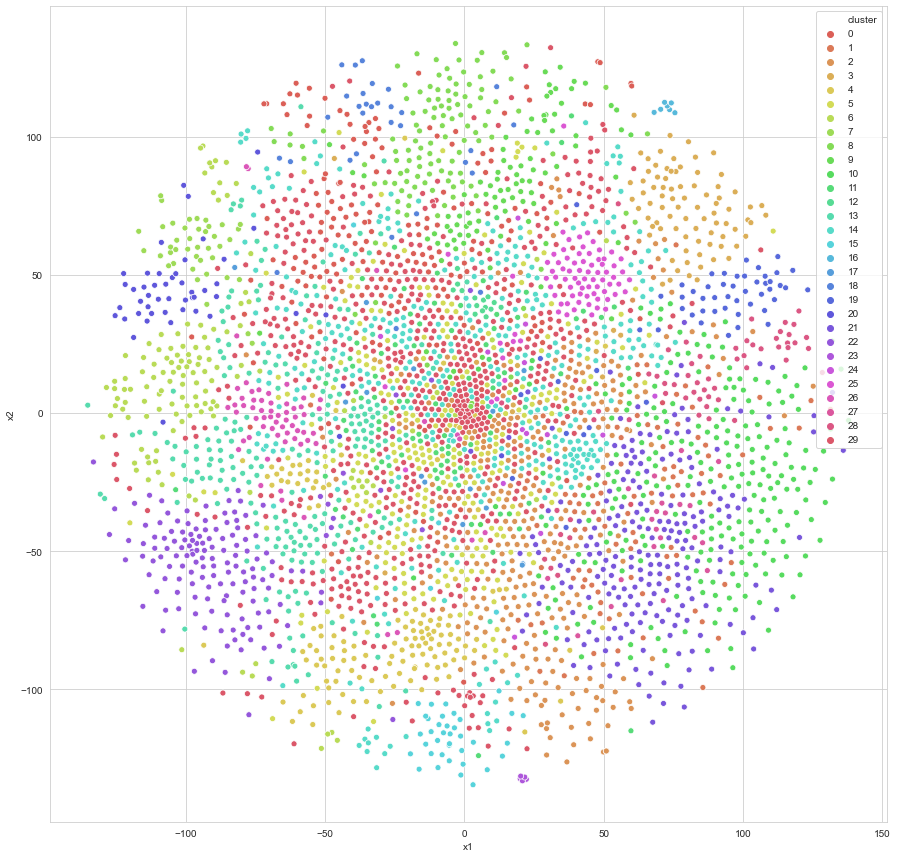

In [137]:
plt.figure(figsize=(15, 15))

sns.scatterplot(x=tsne_df['x1'], y=tsne_df['x2'], hue=tsne_df['cluster'], legend='full', palette=sns.color_palette("hls", 30))
#sns.scatterplot(x=tsne_centroids[:, 0], y=tsne_centroids[:, 1], marker='X', s=100, color='darkred')

# Loading LDA topic model and visualization of topics using t-SNE

## Ovde je radjeno sa raspodelom tema za svaki dokument

In [138]:
def load_model(path='LDA model/lda.model'):
    return LdaModel.load(path)

In [139]:
lda_model = load_model('LDA model/lda.model')
num_topics = lda_model.num_topics
print('Number of topics: {}'.format(num_topics))

Number of topics: 29


In [140]:
topics_distribution = []

for doc in corpus:
    topics = [] 
    topic_pairs = lda_model.get_document_topics(doc, minimum_probability=0.0)
    
    for pair in topic_pairs:
        topics.append(pair[1])
        
    topics_distribution.append(topics)
    
print(len(topics_distribution))

3889


In [113]:
dominant_topic = np.argmax(topics_distribution, axis=1)
dominant_topic

array([ 4, 17, 24, ..., 22,  9,  4], dtype=int64)

In [114]:
tsne_model = TSNE(n_components=2, verbose=1, random_state=33)

In [115]:
# fit t-SNE model on LDA topics
tsne_lda = tsne_model.fit_transform(topics_distribution)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3889 samples in 0.013s...
[t-SNE] Computed neighbors for 3889 samples in 0.744s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3889
[t-SNE] Computed conditional probabilities for sample 2000 / 3889
[t-SNE] Computed conditional probabilities for sample 3000 / 3889
[t-SNE] Computed conditional probabilities for sample 3889 / 3889
[t-SNE] Mean sigma: 0.094931
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.445656
[t-SNE] KL divergence after 1000 iterations: 1.328979


In [116]:
tsne_lda_df = pd.DataFrame(tsne_lda, columns=['x1', 'x2'])
tsne_lda_df['dominant_topic'] = dominant_topic

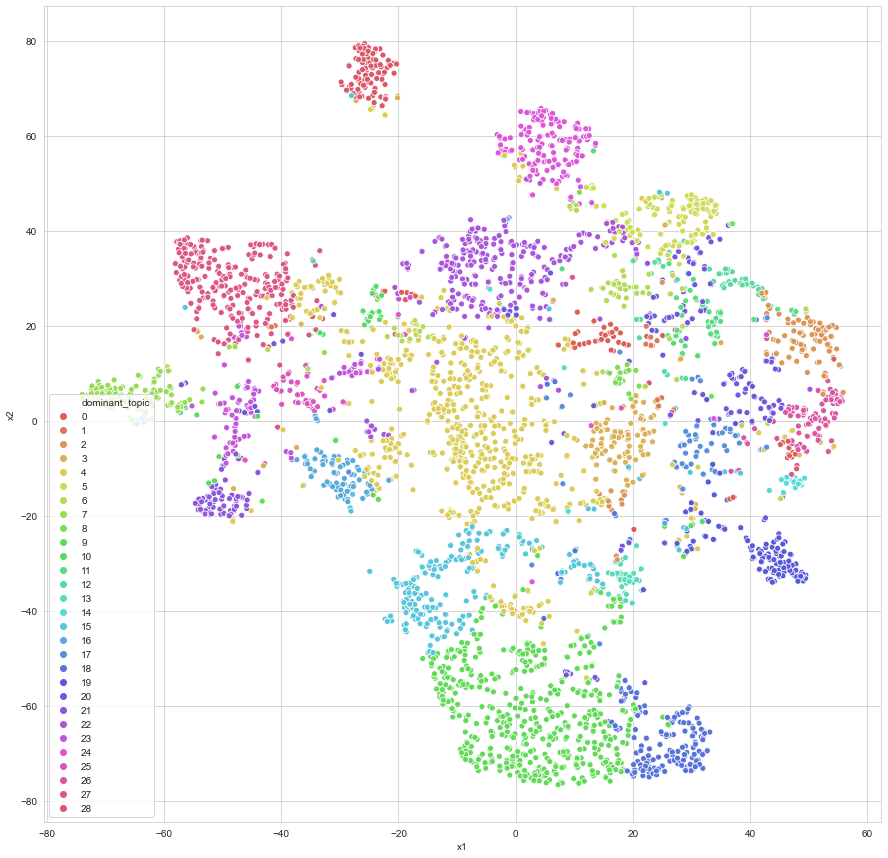

In [117]:
plt.figure(figsize=(15, 15))

sns.scatterplot(x=tsne_lda_df['x1'], y=tsne_lda_df['x2'], hue=tsne_lda_df['dominant_topic'],
                legend='full', palette=sns.color_palette("hls", 29))

# Dokument predstavljam raspodelom fraza u okviru najznacajnije teme. Tezina svake reci pomnozena je sa tezinom dominantne teme za trenutni dokument, kako bi se na neki nacin i to uzelo u obzir (moguce je i dodavanje novog featurea, slican je rezultat)

In [118]:
# num_words = all words in dictionary!
topics = lda_model.show_topics(num_topics=num_topics, num_words=num_terms, formatted=False)
len(topics[0][1])

7037

In [119]:
# topics_data je vektor od 29 elemenata, gde je svaki od elemenata vektor tezina svih reci za tu temu
topics_data = []
for topic in topics:
    weights = []
    for pair in topic[1]:
        #print(pair)
        weights.append(pair[1])
    topics_data.append(weights)

In [120]:
dominant_topic_df = pd.read_csv('dataframes/topics_of_documents.csv')
dominant_topic_df.head()

,dominant_topic,perc_contribution,topic_keywords,filename,text
0,4.0,0.3999,"relief, jurisdiction, action, final, dispute, ...",06_1.xml,background current application applicant holdi...
1,17.0,0.2325,"report, complaint, letter, request, duty, alle...",06_100.xml,application order review judicial_review conce...
2,24.0,0.3343,"client, produce, disclosure, privilege, advice...",06_1001.xml,notice motion file bring first second third ap...
3,0.0,0.1887,"agreement, contract, clause, obligation, enter...",06_1004.xml,introduction brand company know come marketing...
4,21.0,0.1860,"income, assessment, commissioner, taxpayer, en...",06_1005.xml,context present application appeal application...


In [121]:
# svaki dokument predstavlja se raspodelom reci za dominantnu temu tog dokumenta
doc_topic_keywords = []

for index, row in dominant_topic_df.iterrows():
    #document_features = []
    perc_contribution = row['perc_contribution']
    document_features = list(topics_data[int(row['dominant_topic'])])
    
    # mnozenje tezine svake reci sa tezinom dominantne teme
    document_features = [perc_contribution * value for value in document_features]
    
    #document_features.append(row['perc_contribution'])    # ukljucujem i tezinu dominantne teme kao dodatan feature (pored raspodele tezina reci dominantne teme)
    
    doc_topic_keywords.append(document_features)

In [122]:
len(doc_topic_keywords[333])

7037

In [123]:
tsne_topics_model = TSNE(n_components=2, verbose=1, random_state=33)

In [124]:
tsne_topics_data = tsne_topics_model.fit_transform(doc_topic_keywords)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3889 samples in 1.479s...
[t-SNE] Computed neighbors for 3889 samples in 36.799s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3889
[t-SNE] Computed conditional probabilities for sample 2000 / 3889
[t-SNE] Computed conditional probabilities for sample 3000 / 3889
[t-SNE] Computed conditional probabilities for sample 3889 / 3889
[t-SNE] Mean sigma: 0.000504
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.609928
[t-SNE] KL divergence after 1000 iterations: 0.325506


In [125]:
tsne_topics_df = pd.DataFrame(tsne_topics_data, columns=['x1', 'x2'])
tsne_topics_df['dominant_topic'] = list(dominant_topic_df['dominant_topic'])
tsne_topics_df.head()

,x1,x2,dominant_topic
0,23.767838,-63.649410,4.0
1,4.768532,-4.420756,17.0
2,-52.549984,4.832052,24.0
3,32.103939,-3.658521,0.0
4,9.740913,15.742590,21.0


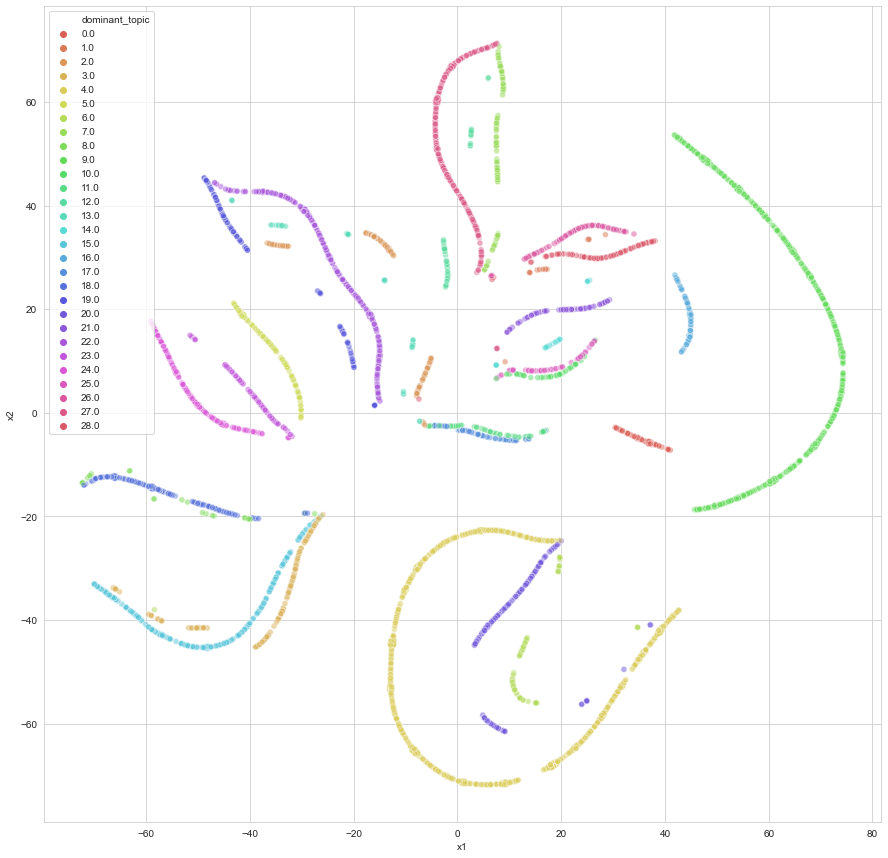

In [126]:
plt.figure(figsize=(15, 15))

sns.scatterplot(x=tsne_topics_df['x1'], y=tsne_topics_df['x2'], hue=tsne_topics_df['dominant_topic'],
                legend='full', palette=sns.color_palette("hls", 29), alpha=0.5)
#sns.scatterplot(x=tsne_centroids[:, 0], y=tsne_centroids[:, 1], marker='X', s=100, color='darkred')

# Add cluster for each document into dataframe

In [127]:
df = pd.read_csv('dataframes/topics_of_documents.csv')
df['cluster'] = labels

df.to_csv('dataframes/topics_clusters_of_documents.csv', index=False)

In [128]:
df.head(20)

,dominant_topic,perc_contribution,topic_keywords,filename,text,cluster
0,4.0,0.3999,"relief, jurisdiction, action, final, dispute, ...",06_1.xml,background current application applicant holdi...,5
1,17.0,0.2325,"report, complaint, letter, request, duty, alle...",06_100.xml,application order review judicial_review conce...,14
2,24.0,0.3343,"client, produce, disclosure, privilege, advice...",06_1001.xml,notice motion file bring first second third ap...,29
3,0.0,0.1887,"agreement, contract, clause, obligation, enter...",06_1004.xml,introduction brand company know come marketing...,29
4,21.0,0.1860,"income, assessment, commissioner, taxpayer, en...",06_1005.xml,context present application appeal application...,5
5,9.0,0.4852,"tribunal, appellant, finding, error, letter, c...",06_1006.xml,appeal judgment barne give include dismissal a...,10
6,22.0,0.4623,"motion, plead, paragraph, trial, third, defenc...",06_1015.xml,notice motion file applicant respect file seek...,5
7,7.0,0.5708,"share, scheme, company, director, meeting, sha...",06_1017.xml,first second limit hold preference share regio...,13
8,18.0,0.2556,"country, return, political, police, convention...",06_1018.xml,application extension time file_serve notice a...,2
9,27.0,0.3745,"company, defendant, plaintiff, creditor, asic,...",06_102.xml,application direction concern fix remuneration...,22


In [129]:
# grupisanje po temi i uzimanje dokumenta sa max tezinom u okviru svake grupe
def get_representative_documents(doc_topics_df):
    df = pd.DataFrame()
    grouped_df = doc_topics_df.groupby('dominant_topic')
    for i, grp in grouped_df:
        df = pd.concat([df, grp.sort_values(['perc_contribution'], ascending=[0]).head(1)], axis=0)
    df.reset_index(inplace=True, drop=True)
    df.columns = ['topic', 'perc_contribution', 'topic_keywords', 'filename', 'text', 'cluster']
    return df

representative_docs_df = get_representative_documents(df)
representative_docs_df

,topic,perc_contribution,topic_keywords,filename,text,cluster
0,0.0,0.5201,"agreement, contract, clause, obligation, enter...",07_136.xml,second respondent apply court order stay proce...,29
1,1.0,0.3789,"business, lease, licence, rent, premise, manag...",09_682.xml,introduction complex situate open comprise num...,29
2,2.0,0.5477,"contravention, penalty, offence, charge, crimi...",06_1732.xml,make application court various remedy arise al...,18
3,3.0,0.5816,"word, determination, subsection, statutory, co...",07_1004.xml,division migration regulation regulation speci...,14
4,4.0,0.6566,"relief, jurisdiction, action, final, dispute, ...",08_47.xml,motion present court seek application leave ap...,5
5,5.0,0.5450,"patent, product, design, copyright, infringeme...",06_1267.xml,follow reason order make applicant appeal cour...,25
6,6.0,0.6227,"report, test, line, level, expert, damage, ris...",06_1141.xml,central issue proceeding concern determination...,29
7,7.0,0.7851,"share, scheme, company, director, meeting, sha...",07_1944.xml,second hear publish reason judgment order make...,6
8,8.0,0.5697,"plan, project, action, condition, shape, tree,...",08_903.xml,table content introduction application make ad...,12
9,9.0,0.7721,"tribunal, appellant, finding, error, letter, c...",09_89.xml,appeal order court dismiss appellant applicati...,21


In [130]:
values, counts = np.unique(labels, return_counts=True)

for val, cnt in zip(values, counts):
    print('{} - {}'.format(val, cnt))

0 - 215
1 - 100
2 - 307
3 - 93
4 - 141
5 - 267
6 - 136
7 - 42
8 - 122
9 - 91
10 - 246
11 - 93
12 - 16
13 - 228
14 - 373
15 - 42
16 - 7
17 - 14
18 - 31
19 - 56
20 - 49
21 - 211
22 - 149
23 - 5
24 - 13
25 - 81
26 - 66
27 - 21
28 - 61
29 - 613


In [131]:
set(representative_docs_df['cluster'])

{0, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 18, 19, 21, 22, 25, 29}